In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
plt.style.use('ggplot')

from datetime import datetime
import datetime as dt

import sklearn.linear_model as lm
import sklearn

from IPython.display import display, Markdown, Latex, Math

# COVID-19

## DS100 Final Project

Gene Ho, Hannah Qi, Jasmine Wu

## Abstract

This project uses different methods and experiments to explore the relationship between the implementation of social distancing measures and democratic to republican ratio for each county in the U.S. The data was obtained from Johns Hopkins University. COVID-19 research is being rapidly published, as it is an important public health crisis. Linear and logistic regressions were performed to find models for this between political preference and social distancing order implementation. The final logistic and log-linear models performed fairly well on our test set. Assuming the coefficients for these models are significant, they should be suitable for modeling the outcomes’ relationship to the selected features.

## Introduction

On January 30, 2020, the World Health Organization (WHO) issued a “public health emergency of international concern,” in response to the discovery of a novel coronavirus (COVID-19) in Wuhan, China. Since then, the virus has rapidly spread across the globe, with 4,088,848 confirmed cases and 283,153 deaths across 212 countries and territories. COVID-19 belongs to the same family as two other influenza-like viruses that caused pandemics in the early 2000s: SARS (Sudden Acute Respiratory Syndrome) and MERS (Middle Eastern Respiratory Syndrome). Within a month of the initial infection, COVID-19 surpassed the final count of SARS cases in 2003. 

Due to the rapid spread of this virus all over the world, everyone has a role to play to reduce and slow the transmission. Social distancing is an essential step in preventing the spread of COVID-19. The predominant political parties have different perspectives on how best to handle this pandemic: “In Florida, Georgia, Texas, and Missouri, for example, local officials in big Democratic-leaning cities (such as Miami, Atlanta, Dallas, and St. Louis) have moved to severely restrict activity. But those mayors have complained that their efforts are being undercut by the refusal of Republican governors—whose support is typically greatest in rural areas—to impose uniform limits across the state” according to Ronald Brownstein. 


## Research Questions

<!-- OLD QUESTIONS: 1. How does the timing of the implementation of various social distancing measures (i.e. time to issue) impact the growth rate of cases?
2. Who would be considered as a highly susceptible population of COVID-19? What characteristics make people more susceptible to COVID-19? -->

1. How does the timing of the implementation of various social distancing measures (i.e. time to issue) predict a county's democrat to republican ratio?
2. How does the timing of the implementation of various social distancing measures (i.e. time to issue) predict a county's political party majority?

## Hypothesis

Counties that took longer to implement social distancing measures since the dates of their first case have lower Democrat to Republican ratios.

## Data Cleaning

We utilized two separate datasets for our analysis: abridged_counties.csv and time_series_covid19_confirmed_US.csv. 

The research question involved time and dates, so the columns in abridged_counties.csv corresponding to the order issue date (i.e. 'stay at home', '>50 gatherings', '>500 gatherings', 'public schools', 'restaurant dine-in', 'entertainment/gym') were converted from proleptic Gregorian ordinal to a pandas Timestamp. Some of the counties were missing state abbreviations, so a dictionary from Github was utilized to map state names to state abbreviations. 

In [2]:
counties = pd.read_csv("./covid-data/abridged_counties.csv")

In [3]:
counties.head()

,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,...,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop
0,01001,1.0,1.0,Autauga,AL,Alabama,32.540091,-86.645649,32.500389,-86.494165,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4354,NaN,NaN,NaN
1,01003,1.0,3.0,Baldwin,AL,Alabama,30.738314,-87.726272,30.548923,-87.762381,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.2162,NaN,NaN,NaN
2,01005,1.0,5.0,Barbour,AL,Alabama,31.874030,-85.397327,31.844036,-85.310038,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.9959,6.08,5400.0,18241.0
3,01007,1.0,7.0,Bibb,AL,Alabama,32.999024,-87.125260,33.030921,-87.127659,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.6003,2.75,14980.0,6120.0
4,01009,1.0,9.0,Blount,AL,Alabama,33.990440,-86.562711,33.955243,-86.591491,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4242,7.21,31850.0,25233.0


In [4]:
counties.columns

Index(['countyFIPS', 'STATEFP', 'COUNTYFP', 'CountyName', 'StateName', 'State',
       'lat', 'lon', 'POP_LATITUDE', 'POP_LONGITUDE', 'CensusRegionName',
       'CensusDivisionName', 'Rural-UrbanContinuumCode2013',
       'PopulationEstimate2018', 'PopTotalMale2017', 'PopTotalFemale2017',
       'FracMale2017', 'PopulationEstimate65+2017',
       'PopulationDensityperSqMile2010', 'CensusPopulation2010',
       'MedianAge2010', '#EligibleforMedicare2018',
       'MedicareEnrollment,AgedTot2017', '3-YrDiabetes2015-17',
       'DiabetesPercentage', 'HeartDiseaseMortality', 'StrokeMortality',
       'Smokers_Percentage', 'RespMortalityRate2014', '#FTEHospitalTotal2017',
       'TotalM.D.'s,TotNon-FedandFed2017', '#HospParticipatinginNetwork2017',
       '#Hospitals', '#ICU_beds', 'dem_to_rep_ratio', 'PopMale<52010',
       'PopFmle<52010', 'PopMale5-92010', 'PopFmle5-92010', 'PopMale10-142010',
       'PopFmle10-142010', 'PopMale15-192010', 'PopFmle15-192010',
       'PopMale20-242010', 'P

In [5]:
confirmed_df = pd.read_csv("./covid-data/time_series_covid19_confirmed_US.csv")
confirmed_df.head(10)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,...,128,130,133,133,133,133,135,135,136,136
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,...,11,11,11,11,11,11,13,13,13,14
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.220800,-66.590100,...,683,725,788,897,903,923,974,1043,1068,1118
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.335800,-64.896300,...,45,50,51,51,51,51,51,51,51,53
5,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,15,17,19,19,19,23,24,26,26,25
6,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,56,59,66,71,72,87,91,101,103,109
7,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,4,9,9,10,10,11,12,14,15,18
8,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,9,11,13,16,17,17,18,22,24,26
9,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,11,12,12,13,14,16,17,18,20,20


In [6]:
# created a new table
df = counties[[
    'countyFIPS', 'STATEFP', 'COUNTYFP', 'CountyName', 'StateName', 'State',
    'lat', 'lon', 'POP_LATITUDE', 'PopulationEstimate2018', 'POP_LONGITUDE',
    'dem_to_rep_ratio', 'stay at home', '>50 gatherings', '>500 gatherings',
    'public schools', 'restaurant dine-in', 'entertainment/gym',
    'federal guidelines', 'foreign travel ban'
]]

In [7]:
df.head(5)

,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,PopulationEstimate2018,POP_LONGITUDE,dem_to_rep_ratio,stay at home,>50 gatherings,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban
0,01001,1.0,1.0,Autauga,AL,Alabama,32.540091,-86.645649,32.500389,55601.0,-86.494165,0.326656,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0
1,01003,1.0,3.0,Baldwin,AL,Alabama,30.738314,-87.726272,30.548923,218022.0,-87.762381,0.253255,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0
2,01005,1.0,5.0,Barbour,AL,Alabama,31.874030,-85.397327,31.844036,24881.0,-85.310038,0.893106,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0
3,01007,1.0,7.0,Bibb,AL,Alabama,32.999024,-87.125260,33.030921,22400.0,-87.127659,0.278124,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0
4,01009,1.0,9.0,Blount,AL,Alabama,33.990440,-86.562711,33.955243,57840.0,-86.591491,0.094317,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0


In [8]:
# from https://gist.github.com/JeffPaine/3083347
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands': 'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

df["State"] = df['StateName'].map(dict(map(reversed, us_state_abbrev.items())))

/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [9]:
# a function to convert times from Gregorian ordinal date to pandas Timestamp
def convert_time(df, columns):
    data = df.copy()

    if isinstance(columns, list):
        for col in columns:
            if not isinstance(data[col][0], pd.Timestamp):
                data[col] = data[col].dropna().astype(int).map(
                    pd.Timestamp.fromordinal)
    else:
        if not isinstance(data[columns][0], pd.Timestamp):
            data[columns] = data[columns].dropna().astype(int).map(
                pd.Timestamp.fromordinal)
    return data

In [10]:
# apply func to the dataframe
df = convert_time(df, [
    'stay at home', '>50 gatherings', '>500 gatherings', 'public schools',
    'restaurant dine-in', 'entertainment/gym', 'federal guidelines',
    'foreign travel ban'
])
df

,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,PopulationEstimate2018,POP_LONGITUDE,dem_to_rep_ratio,stay at home,>50 gatherings,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban
0,01001,1.0,1.0,Autauga,AL,Alabama,32.540091,-86.645649,32.500389,55601.0,-86.494165,0.326656,2020-04-04,2020-03-20,2020-03-13,2020-03-16,2020-03-19,2020-03-28,2020-03-16,2020-03-11
1,01003,1.0,3.0,Baldwin,AL,Alabama,30.738314,-87.726272,30.548923,218022.0,-87.762381,0.253255,2020-04-04,2020-03-20,2020-03-13,2020-03-16,2020-03-19,2020-03-28,2020-03-16,2020-03-11
2,01005,1.0,5.0,Barbour,AL,Alabama,31.874030,-85.397327,31.844036,24881.0,-85.310038,0.893106,2020-04-04,2020-03-20,2020-03-13,2020-03-16,2020-03-19,2020-03-28,2020-03-16,2020-03-11
3,01007,1.0,7.0,Bibb,AL,Alabama,32.999024,-87.125260,33.030921,22400.0,-87.127659,0.278124,2020-04-04,2020-03-20,2020-03-13,2020-03-16,2020-03-19,2020-03-28,2020-03-16,2020-03-11
4,01009,1.0,9.0,Blount,AL,Alabama,33.990440,-86.562711,33.955243,57840.0,-86.591491,0.094317,2020-04-04,2020-03-20,2020-03-13,2020-03-16,2020-03-19,2020-03-28,2020-03-16,2020-03-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3239,15005,15.0,5.0,Kalawao,HI,Hawaii,NaN,NaN,21.188495,88.0,-156.979972,NaN,2020-03-25,2020-03-25,2020-03-25,2020-03-23,2020-03-20,2020-03-25,2020-03-16,2020-03-11
3240,72039,72.0,39.0,Ciales Municipio,PR,Puerto Rico,NaN,NaN,18.314399,15918.0,-66.494215,NaN,NaT,NaT,NaT,2020-03-16,2020-03-15,2020-03-15,2020-03-16,2020-03-11
3241,72069,72.0,69.0,Humacao Municipio,PR,Puerto Rico,NaN,NaN,18.144804,50532.0,-65.817109,NaN,NaT,NaT,NaT,2020-03-16,2020-03-15,2020-03-15,2020-03-16,2020-03-11
3242,City1,NaN,NaN,New York City,NY,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


In [11]:
# dropping NYC and Kansas City because they are cities not counties
df.drop([3242, 3243], inplace=True)
# df[df['CountyName'].isna()]


# NYC is **not** a county so we are expecting an empty df
df[df['CountyName'] == 'New York City']

,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,PopulationEstimate2018,POP_LONGITUDE,dem_to_rep_ratio,stay at home,>50 gatherings,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban


In [12]:
df.head()

,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,PopulationEstimate2018,POP_LONGITUDE,dem_to_rep_ratio,stay at home,>50 gatherings,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban
0,01001,1.0,1.0,Autauga,AL,Alabama,32.540091,-86.645649,32.500389,55601.0,-86.494165,0.326656,2020-04-04,2020-03-20,2020-03-13,2020-03-16,2020-03-19,2020-03-28,2020-03-16,2020-03-11
1,01003,1.0,3.0,Baldwin,AL,Alabama,30.738314,-87.726272,30.548923,218022.0,-87.762381,0.253255,2020-04-04,2020-03-20,2020-03-13,2020-03-16,2020-03-19,2020-03-28,2020-03-16,2020-03-11
2,01005,1.0,5.0,Barbour,AL,Alabama,31.874030,-85.397327,31.844036,24881.0,-85.310038,0.893106,2020-04-04,2020-03-20,2020-03-13,2020-03-16,2020-03-19,2020-03-28,2020-03-16,2020-03-11
3,01007,1.0,7.0,Bibb,AL,Alabama,32.999024,-87.125260,33.030921,22400.0,-87.127659,0.278124,2020-04-04,2020-03-20,2020-03-13,2020-03-16,2020-03-19,2020-03-28,2020-03-16,2020-03-11
4,01009,1.0,9.0,Blount,AL,Alabama,33.990440,-86.562711,33.955243,57840.0,-86.591491,0.094317,2020-04-04,2020-03-20,2020-03-13,2020-03-16,2020-03-19,2020-03-28,2020-03-16,2020-03-11


In [13]:
# creating a new column "new FIPS" of df's "countyFIPS" as integer
df = df[df['countyFIPS'].notna()]
# df.astype({'countyFIPS':'int32'}).dtypes
df['new FIPS'] = df['countyFIPS'].astype('int32')
df

,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,PopulationEstimate2018,...,dem_to_rep_ratio,stay at home,>50 gatherings,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,new FIPS
0,01001,1.0,1.0,Autauga,AL,Alabama,32.540091,-86.645649,32.500389,55601.0,...,0.326656,2020-04-04,2020-03-20,2020-03-13,2020-03-16,2020-03-19,2020-03-28,2020-03-16,2020-03-11,1001
1,01003,1.0,3.0,Baldwin,AL,Alabama,30.738314,-87.726272,30.548923,218022.0,...,0.253255,2020-04-04,2020-03-20,2020-03-13,2020-03-16,2020-03-19,2020-03-28,2020-03-16,2020-03-11,1003
2,01005,1.0,5.0,Barbour,AL,Alabama,31.874030,-85.397327,31.844036,24881.0,...,0.893106,2020-04-04,2020-03-20,2020-03-13,2020-03-16,2020-03-19,2020-03-28,2020-03-16,2020-03-11,1005
3,01007,1.0,7.0,Bibb,AL,Alabama,32.999024,-87.125260,33.030921,22400.0,...,0.278124,2020-04-04,2020-03-20,2020-03-13,2020-03-16,2020-03-19,2020-03-28,2020-03-16,2020-03-11,1007
4,01009,1.0,9.0,Blount,AL,Alabama,33.990440,-86.562711,33.955243,57840.0,...,0.094317,2020-04-04,2020-03-20,2020-03-13,2020-03-16,2020-03-19,2020-03-28,2020-03-16,2020-03-11,1009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3237,02230,2.0,230.0,Skagway Municipality,AK,Alaska,NaN,NaN,59.464536,1148.0,...,NaN,2020-03-28,2020-03-24,2020-03-24,2020-03-19,2020-03-17,2020-03-17,2020-03-16,2020-03-11,2230
3238,02275,2.0,275.0,Wrangell City and Borough,AK,Alaska,NaN,NaN,56.385821,2503.0,...,NaN,2020-03-28,2020-03-24,2020-03-24,2020-03-19,2020-03-17,2020-03-17,2020-03-16,2020-03-11,2275
3239,15005,15.0,5.0,Kalawao,HI,Hawaii,NaN,NaN,21.188495,88.0,...,NaN,2020-03-25,2020-03-25,2020-03-25,2020-03-23,2020-03-20,2020-03-25,2020-03-16,2020-03-11,15005
3240,72039,72.0,39.0,Ciales Municipio,PR,Puerto Rico,NaN,NaN,18.314399,15918.0,...,NaN,NaT,NaT,NaT,2020-03-16,2020-03-15,2020-03-15,2020-03-16,2020-03-11,72039


In [14]:
# creating a new column "new FIPS" of confimed_df's "FIP" as integer

confirmed_df = confirmed_df.rename(columns={'Admin2': 'CountyName'})
confirmed_df = confirmed_df[confirmed_df['FIPS'].notna()]
confirmed_df["new FIPS"] = confirmed_df['FIPS'].astype('int32')
confirmed_df

,UID,iso2,iso3,code3,FIPS,CountyName,Province_State,Country_Region,Lat,Long_,...,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,new FIPS
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,60
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,130,133,133,133,133,135,135,136,136,66
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,11,11,11,11,11,13,13,13,14,69
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,725,788,897,903,923,974,1043,1068,1118,72
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,50,51,51,51,51,51,51,51,53,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3248,84090053,US,USA,840,90053.0,Unassigned,Washington,US,0.0000,0.0000,...,908,848,732,619,484,383,272,334,444,90053
3249,84090054,US,USA,840,90054.0,Unassigned,West Virginia,US,0.0000,0.0000,...,0,0,0,0,0,0,0,0,0,90054
3250,84090055,US,USA,840,90055.0,Unassigned,Wisconsin,US,0.0000,0.0000,...,0,0,0,0,1,1,0,0,0,90055
3251,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.0000,0.0000,...,0,0,0,0,0,0,0,0,0,90056


## Data Cleaning (continued)

Then, the two dataframes were joined on FIPS, which is a unique identifier for each county. After joining, only the relevant columns were kept. Counties that did not have a reported value for the outcome variable (‘dem_to_rep_ratio’) were removed from the dataset. The date of the first case for each county was identified by defining the first_case() function and also converted them to a pandas Timestamp. The data in both datasets included information only up until 4/18/20, so missing dates were imputed to be 4/19/20 to reflect it being outside of the scope of the data without introducing excessive bias. Table 1 describes the columns of final_df. 

The predictor variables were the number of days in relation to the day of the first reported case of COVID-19. Since all dates were already in pandas Timestamp format, the order issue date was subtracted from the first case date to get the time to issue for each order. Negative values indicate that a county was proactive, instead of reactive, in these prevention measures. pandas Timedelta class appended “days” to the time difference; this was removed by converting it to a datetime class. 

In [15]:
# joining df table and confirmed_df table by "new FIPS"
joint_table = pd.merge(df, confirmed_df, how='inner', on=['new FIPS'])

In [16]:
## column index of new FIPS and dates (i.e. simplified confirmed df)
# joint_table.columns.get_loc("new FIPS") # 20
# joint_table.columns.get_loc("4/18/20") # 119
# joint_table.columns.get_loc("1/22/20") # 32
another_attempt_first = joint_table.iloc[:, np.r_[20, 32:119]]

another_attempt_first.head()

,new FIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20
0,1001,0,0,0,0,0,0,0,0,0,...,12,15,17,19,19,19,23,24,26,26
1,1003,0,0,0,0,0,0,0,0,0,...,44,56,59,66,71,72,87,91,101,103
2,1005,0,0,0,0,0,0,0,0,0,...,3,4,9,9,10,10,11,12,14,15
3,1007,0,0,0,0,0,0,0,0,0,...,9,9,11,13,16,17,17,18,22,24
4,1009,0,0,0,0,0,0,0,0,0,...,10,11,12,12,13,14,16,17,18,20


In [17]:
# function that catches each county's date of first case. if no date exists for that county, its first date will be recorded as 4/19/20
def first_case(df):
    firstcasedate_list = []
    for i in df.index:
        if df.iloc[i, len(df.columns) - 1] == 0:
            firstcasedate_list.append(
                '4/19/20'
            )  #equivalent to NA value since it is not included in the df
            continue
        for j in range(1, len(df.columns)):
            if df.iloc[i, j] > 0:
                date = df.columns[j]
                firstcasedate_list.append(date)
                break
    return firstcasedate_list

In [18]:
# joint table with new column of each county's date of first case
joint_table["Date of First Case"] = pd.Series(
    first_case(another_attempt_first))

joint_table

,countyFIPS,STATEFP,COUNTYFP,CountyName_x,StateName,State,lat,lon,POP_LATITUDE,PopulationEstimate2018,...,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,Date of First Case
0,01001,1.0,1.0,Autauga,AL,Alabama,32.540091,-86.645649,32.500389,55601.0,...,17,19,19,19,23,24,26,26,25,3/24/20
1,01003,1.0,3.0,Baldwin,AL,Alabama,30.738314,-87.726272,30.548923,218022.0,...,59,66,71,72,87,91,101,103,109,3/15/20
2,01005,1.0,5.0,Barbour,AL,Alabama,31.874030,-85.397327,31.844036,24881.0,...,9,9,10,10,11,12,14,15,18,4/3/20
3,01007,1.0,7.0,Bibb,AL,Alabama,32.999024,-87.125260,33.030921,22400.0,...,11,13,16,17,17,18,22,24,26,3/30/20
4,01009,1.0,9.0,Blount,AL,Alabama,33.990440,-86.562711,33.955243,57840.0,...,12,12,13,14,16,17,18,20,20,3/25/20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,02195,2.0,195.0,Petersburg Borough,AK,Alaska,NaN,NaN,56.812712,3221.0,...,2,2,2,2,2,2,2,2,2,4/3/20
3136,02198,2.0,198.0,Prince of Wales-Hyder Census Area,AK,Alaska,NaN,NaN,55.448164,6422.0,...,0,1,1,1,2,2,2,2,2,4/11/20
3137,02230,2.0,230.0,Skagway Municipality,AK,Alaska,NaN,NaN,59.464536,1148.0,...,0,0,0,0,0,0,0,0,0,4/19/20
3138,02275,2.0,275.0,Wrangell City and Borough,AK,Alaska,NaN,NaN,56.385821,2503.0,...,0,0,0,0,0,0,0,0,0,4/19/20


In [19]:
# changing the format of date in the joint_table
joint_table["Date of First Case"] = pd.to_datetime(
    joint_table["Date of First Case"]).dt.strftime('%Y-%m-%d')
joint_table.tail()

,countyFIPS,STATEFP,COUNTYFP,CountyName_x,StateName,State,lat,lon,POP_LATITUDE,PopulationEstimate2018,...,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,Date of First Case
3135,02195,2.0,195.0,Petersburg Borough,AK,Alaska,NaN,NaN,56.812712,3221.0,...,2,2,2,2,2,2,2,2,2,2020-04-03
3136,02198,2.0,198.0,Prince of Wales-Hyder Census Area,AK,Alaska,NaN,NaN,55.448164,6422.0,...,0,1,1,1,2,2,2,2,2,2020-04-11
3137,02230,2.0,230.0,Skagway Municipality,AK,Alaska,NaN,NaN,59.464536,1148.0,...,0,0,0,0,0,0,0,0,0,2020-04-19
3138,02275,2.0,275.0,Wrangell City and Borough,AK,Alaska,NaN,NaN,56.385821,2503.0,...,0,0,0,0,0,0,0,0,0,2020-04-19
3139,15005,15.0,5.0,Kalawao,HI,Hawaii,NaN,NaN,21.188495,88.0,...,0,0,0,0,0,0,0,0,0,2020-04-19


In [20]:
# a new dataframe with more relevant columns
new_df = joint_table[[
    'countyFIPS', 'CountyName_x', 'StateName', 'State', 'dem_to_rep_ratio',
    'Date of First Case', 'stay at home', '>50 gatherings', '>500 gatherings',
    'public schools', 'restaurant dine-in', 'entertainment/gym'
]]
new_df

,countyFIPS,CountyName_x,StateName,State,dem_to_rep_ratio,Date of First Case,stay at home,>50 gatherings,>500 gatherings,public schools,restaurant dine-in,entertainment/gym
0,01001,Autauga,AL,Alabama,0.326656,2020-03-24,2020-04-04,2020-03-20,2020-03-13,2020-03-16,2020-03-19,2020-03-28
1,01003,Baldwin,AL,Alabama,0.253255,2020-03-15,2020-04-04,2020-03-20,2020-03-13,2020-03-16,2020-03-19,2020-03-28
2,01005,Barbour,AL,Alabama,0.893106,2020-04-03,2020-04-04,2020-03-20,2020-03-13,2020-03-16,2020-03-19,2020-03-28
3,01007,Bibb,AL,Alabama,0.278124,2020-03-30,2020-04-04,2020-03-20,2020-03-13,2020-03-16,2020-03-19,2020-03-28
4,01009,Blount,AL,Alabama,0.094317,2020-03-25,2020-04-04,2020-03-20,2020-03-13,2020-03-16,2020-03-19,2020-03-28
...,...,...,...,...,...,...,...,...,...,...,...,...
3135,02195,Petersburg Borough,AK,Alaska,NaN,2020-04-03,2020-03-28,2020-03-24,2020-03-24,2020-03-19,2020-03-17,2020-03-17
3136,02198,Prince of Wales-Hyder Census Area,AK,Alaska,NaN,2020-04-11,2020-03-28,2020-03-24,2020-03-24,2020-03-19,2020-03-17,2020-03-17
3137,02230,Skagway Municipality,AK,Alaska,NaN,2020-04-19,2020-03-28,2020-03-24,2020-03-24,2020-03-19,2020-03-17,2020-03-17
3138,02275,Wrangell City and Borough,AK,Alaska,NaN,2020-04-19,2020-03-28,2020-03-24,2020-03-24,2020-03-19,2020-03-17,2020-03-17


In [21]:
# print(new_df['dem_to_rep_ratio'].isna().sum()) # 26 counties without our outcome

new_df.dropna(subset=['dem_to_rep_ratio'], inplace=True)
#we had to drop all the rows that had NAN in the 'dem_to_rep_ratio' column
#some were counties from Alaska and Hawaii

/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [22]:
# some counties did not have a date of order for 'stay at home', '>50 gatherings', '>500 gatherings', and 'entertainment/gym'
# assume that they implemented it after the last day of data collection
# impute with last date + 1 = April 19, 2020
new_df['Date of First Case'] = pd.to_datetime(new_df['Date of First Case'])
# april_19 = dt.datetime.strptime("2020-04-19", '%Y-%m-%d')
april_19 = pd.to_datetime("2020-04-19")

var_columns = [
    'Date of First Case', 'stay at home', '>50 gatherings', '>500 gatherings',
    'public schools', 'restaurant dine-in', 'entertainment/gym'
]

new_df[var_columns].apply(pd.to_datetime, errors='coerce')

print(new_df.isna().sum())

new_df = new_df.fillna(april_19)

countyFIPS              0
CountyName_x            0
StateName               0
State                   0
dem_to_rep_ratio        0
Date of First Case      0
stay at home          489
>50 gatherings        118
>500 gatherings       118
public schools          0
restaurant dine-in      0
entertainment/gym      65
dtype: int64


/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [23]:
# making sure there are no more NAN dates for the orders
new_df.isna().sum()

countyFIPS            0
CountyName_x          0
StateName             0
State                 0
dem_to_rep_ratio      0
Date of First Case    0
stay at home          0
>50 gatherings        0
>500 gatherings       0
public schools        0
restaurant dine-in    0
entertainment/gym     0
dtype: int64

In [24]:
new_df

,countyFIPS,CountyName_x,StateName,State,dem_to_rep_ratio,Date of First Case,stay at home,>50 gatherings,>500 gatherings,public schools,restaurant dine-in,entertainment/gym
0,01001,Autauga,AL,Alabama,0.326656,2020-03-24,2020-04-04,2020-03-20,2020-03-13,2020-03-16,2020-03-19,2020-03-28
1,01003,Baldwin,AL,Alabama,0.253255,2020-03-15,2020-04-04,2020-03-20,2020-03-13,2020-03-16,2020-03-19,2020-03-28
2,01005,Barbour,AL,Alabama,0.893106,2020-04-03,2020-04-04,2020-03-20,2020-03-13,2020-03-16,2020-03-19,2020-03-28
3,01007,Bibb,AL,Alabama,0.278124,2020-03-30,2020-04-04,2020-03-20,2020-03-13,2020-03-16,2020-03-19,2020-03-28
4,01009,Blount,AL,Alabama,0.094317,2020-03-25,2020-04-04,2020-03-20,2020-03-13,2020-03-16,2020-03-19,2020-03-28
...,...,...,...,...,...,...,...,...,...,...,...,...
3129,56041,Uinta,WY,Wyoming,0.195320,2020-04-02,2020-03-28,2020-03-20,2020-03-20,2020-03-20,2020-03-19,2020-03-19
3130,56043,Washakie,WY,Wyoming,0.182755,2020-03-27,2020-03-28,2020-03-20,2020-03-20,2020-03-20,2020-03-19,2020-03-19
3131,56045,Weston,WY,Wyoming,0.098582,2020-04-19,2020-03-28,2020-03-20,2020-03-20,2020-03-20,2020-03-19,2020-03-19
3132,08014,Broomfield,CO,Colorado,1.373356,2020-03-20,2020-03-26,2020-03-24,2020-03-13,2020-03-23,2020-03-20,2020-03-17


In [25]:
# number of days between date of first case and order (order - date of first case)

for column in var_columns[1:]:
    new_df.loc[:, column] = pd.to_datetime(new_df.loc[:, column])
    new_df[column] = new_df[column] - new_df['Date of First Case']
    new_df[column] = new_df[column].dt.days
#     new_df[column] = new_df[column].astype(dt.timedelta).map(lambda x: np.nan if pd.isnull(x) else x.days)

In [26]:
new_df.head()

,countyFIPS,CountyName_x,StateName,State,dem_to_rep_ratio,Date of First Case,stay at home,>50 gatherings,>500 gatherings,public schools,restaurant dine-in,entertainment/gym
0,01001,Autauga,AL,Alabama,0.326656,2020-03-24,11,-4,-11,-8,-5,4
1,01003,Baldwin,AL,Alabama,0.253255,2020-03-15,20,5,-2,1,4,13
2,01005,Barbour,AL,Alabama,0.893106,2020-04-03,1,-14,-21,-18,-15,-6
3,01007,Bibb,AL,Alabama,0.278124,2020-03-30,5,-10,-17,-14,-11,-2
4,01009,Blount,AL,Alabama,0.094317,2020-03-25,10,-5,-12,-9,-6,3


In [27]:
# a final dataframe
final_df = new_df[[
    'countyFIPS', 'CountyName_x', 'StateName', 'dem_to_rep_ratio',
    'Date of First Case', 'stay at home', '>50 gatherings', '>500 gatherings',
    'public schools', 'restaurant dine-in', 'entertainment/gym'
]]

final_df = final_df.rename(columns = {'CountyName_x' : 'CountyName'})

print(final_df.shape[0], "counties in our df")
final_df.head()

# negative values means county was proactive and implemented it before first case

3114 counties in our df


,countyFIPS,CountyName,StateName,dem_to_rep_ratio,Date of First Case,stay at home,>50 gatherings,>500 gatherings,public schools,restaurant dine-in,entertainment/gym
0,01001,Autauga,AL,0.326656,2020-03-24,11,-4,-11,-8,-5,4
1,01003,Baldwin,AL,0.253255,2020-03-15,20,5,-2,1,4,13
2,01005,Barbour,AL,0.893106,2020-04-03,1,-14,-21,-18,-15,-6
3,01007,Bibb,AL,0.278124,2020-03-30,5,-10,-17,-14,-11,-2
4,01009,Blount,AL,0.094317,2020-03-25,10,-5,-12,-9,-6,3


## EDA

### COVID-19 Landscape

### Order of Orders

A grouped bar chart was created to map the “order of orders,” or the sequence of issuance for each social/physical distancing measure by each county. The stay at home order was by far the most common first measure implemented by US counties. The closure of public school was often the last order that was issued. There were virtually no stay at home and gym/entertainment venue closure orders as the last order. 

In [28]:
# order by which order is implemented first

temp = np.flip(
    final_df[[
        'stay at home', '>50 gatherings', '>500 gatherings', 'public schools',
        'restaurant dine-in', 'entertainment/gym'
    ]].values.argsort(), 1)
ndf = pd.DataFrame(final_df[[
    'stay at home', '>50 gatherings', '>500 gatherings', 'public schools',
    'restaurant dine-in', 'entertainment/gym'
]].columns[temp])

# final_df.columns

ndf.head()

/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:11: DeprecationWarning: Support for multi-dimensional indexing (e.g. `index[:, None]`) on an Index is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


,0,1,2,3,4,5
0,stay at home,entertainment/gym,>50 gatherings,restaurant dine-in,public schools,>500 gatherings
1,stay at home,entertainment/gym,>50 gatherings,restaurant dine-in,public schools,>500 gatherings
2,stay at home,entertainment/gym,>50 gatherings,restaurant dine-in,public schools,>500 gatherings
3,stay at home,entertainment/gym,>50 gatherings,restaurant dine-in,public schools,>500 gatherings
4,stay at home,entertainment/gym,>50 gatherings,restaurant dine-in,public schools,>500 gatherings


In [29]:
orders_order = pd.DataFrame()
for col in ndf.columns:
    orders_order[col] = ndf[col].value_counts()

In [30]:
orders_order = orders_order.fillna(0).rename(columns={
    0: 1,
    1: 2,
    2: 3,
    3: 4,
    4: 5,
    5: 6
})

orders_order = orders_order.reset_index().melt('index',
                                               var_name='cols',
                                               value_name='vals')

In [31]:
orders_order.head()

,index,cols,vals
0,stay at home,1,2157.0
1,>500 gatherings,1,500.0
2,entertainment/gym,1,255.0
3,>50 gatherings,1,143.0
4,public schools,1,59.0


''

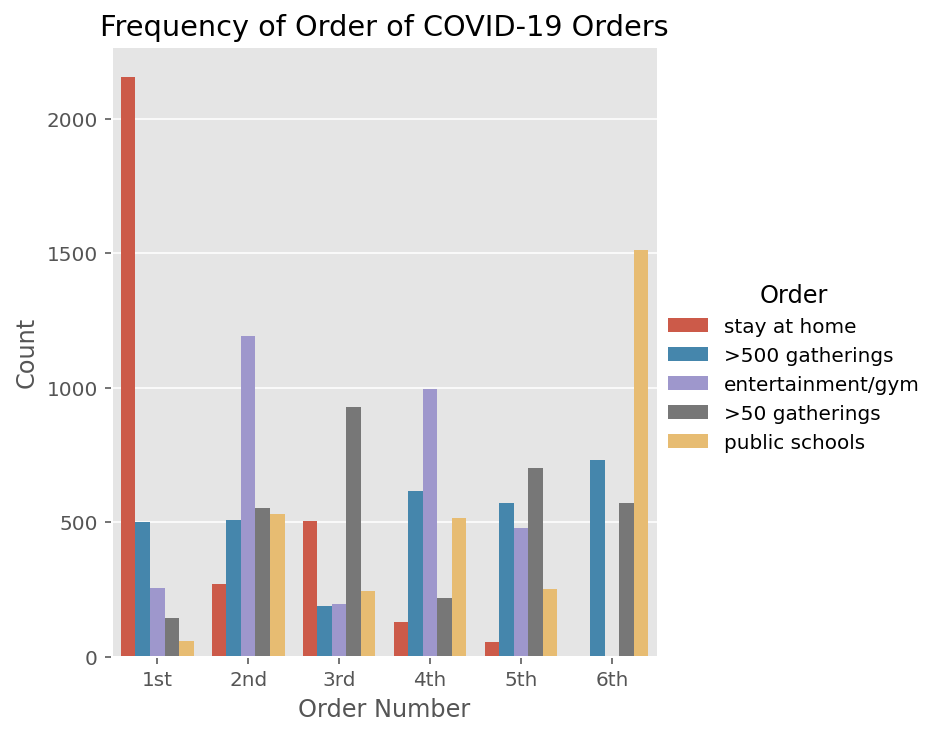

In [32]:
# sns.distplot(orders_order.columns, hist_kws={"weights":orders_order.values()})


# not sure if this way makes sense
# can potentially swap "cols" and "index"
order_bar = sns.catplot(x="cols", y="vals", hue='index', data=orders_order, kind = "bar", orient = "v")

# order_bar.set_xticklabels(rotation=90)

plt.title("Frequency of Order of COVID-19 Orders")

order_bar.set_xticklabels(['1st', '2nd', '3rd', '4th', '5th', '6th'])
plt.xlabel("Order Number")
plt.ylabel("Count")
order_bar._legend.set_title("Order")

;

### Outcome Variable: Democrat to Republican Ratio

‘dem_to_rep_ratio’ was plotted as a histogram and box plot. The histogram was extremely right skewed, and extreme outliers were not readily apparent. However, the box plot showed that there were plenty of outliers, with a maximum of 22.23 democratic voters for every Republican voter. The minimum value was 0.03, which is 741 times smaller than the maximum--a very large range. There were a total of 265 counties that were considered outliers. 

In [33]:
# summary statistics for our outcome of interest

print(min(final_df['dem_to_rep_ratio']), np.median(final_df['dem_to_rep_ratio']),
      np.mean(final_df['dem_to_rep_ratio']),
      max(final_df['dem_to_rep_ratio']))

0.03355704697986577 0.4272324339539062 0.6624011380945274 22.229820011003696


In [34]:
# taking a look at the outliers

# to get the 25th percentile/first quartile
Q1 = np.percentile(final_df['dem_to_rep_ratio'], 25)
# to get the 75th percentile/third quartile
Q3 = np.percentile(final_df['dem_to_rep_ratio'], 75)
# to get IQR
dem_rep_iqr = Q3- Q1 #0.461
# to get outliers
outliers_below_Q1 = Q1 - 1.5*dem_rep_iqr # -0.42
outliers_above_Q3 = Q3 + 1.5*dem_rep_iqr # 1.42

# outlier counties
# (final_df[final_df['dem_to_rep_ratio'] <= outliers_below_Q1]).sort_values(
#     by='dem_to_rep_ratio') 
# There is no couties below the first interquartile ranges
(final_df[final_df['dem_to_rep_ratio'] >= outliers_above_Q3]).sort_values(
    by='dem_to_rep_ratio')

,countyFIPS,CountyName,StateName,dem_to_rep_ratio,Date of First Case,stay at home,>50 gatherings,>500 gatherings,public schools,restaurant dine-in,entertainment/gym
1136,22065,Madison,LA,1.423975,2020-03-26,-3,-9,-9,-10,-9,-9
1214,25013,Hampden,MA,1.430895,2020-03-16,8,1,1,1,1,1
2788,49043,Summit,UT,1.432292,2020-03-11,16,7,1,5,7,7
2862,51107,Loudoun,VA,1.440978,2020-03-10,20,14,14,6,13,6
2038,39009,Athens,OH,1.441783,2020-03-26,-3,-11,-11,-9,-11,-4
...,...,...,...,...,...,...,...,...,...,...,...
1849,36061,New York,NY,8.917633,2020-03-02,20,14,11,16,14,14
217,06075,San Francisco,CA,9.156336,2020-03-05,14,14,14,14,10,10
1821,36005,Bronx,NY,9.356457,2020-04-19,-28,-34,-37,-32,-34,-34
1199,24033,Prince Georges,MD,10.485782,2020-03-10,20,6,3,6,6,6


''

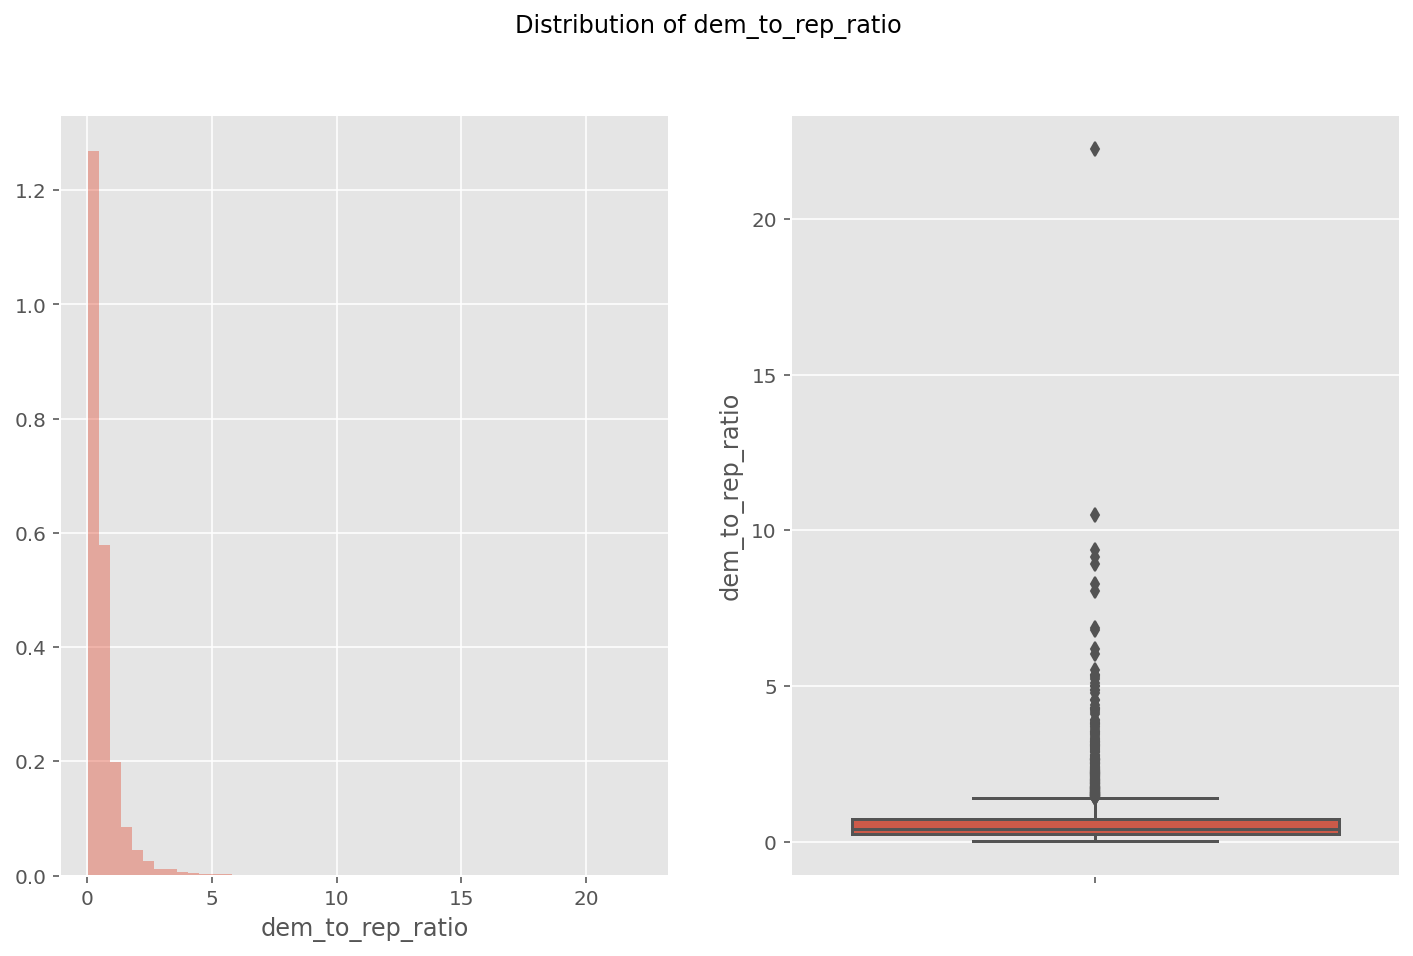

In [35]:
f, axes = plt.subplots(1, 2)

outcome_hist = sns.distplot(final_df['dem_to_rep_ratio'] , kde = False, norm_hist = True, ax=axes[0]) # can't see the max value of 22...some more digging is needed

outcome_box = sns.boxplot(final_df['dem_to_rep_ratio'],  orient='v' , ax=axes[1]) # lots of outliers that are 1.5 IQR above the third quartile
plt.suptitle("Distribution of dem_to_rep_ratio")
;

# data appears biased since democrats are in the numerator

# even though there is a lot of skew, we can use a linear regression
# and assume normality due to the central limit theorm

### Log Transforming

''

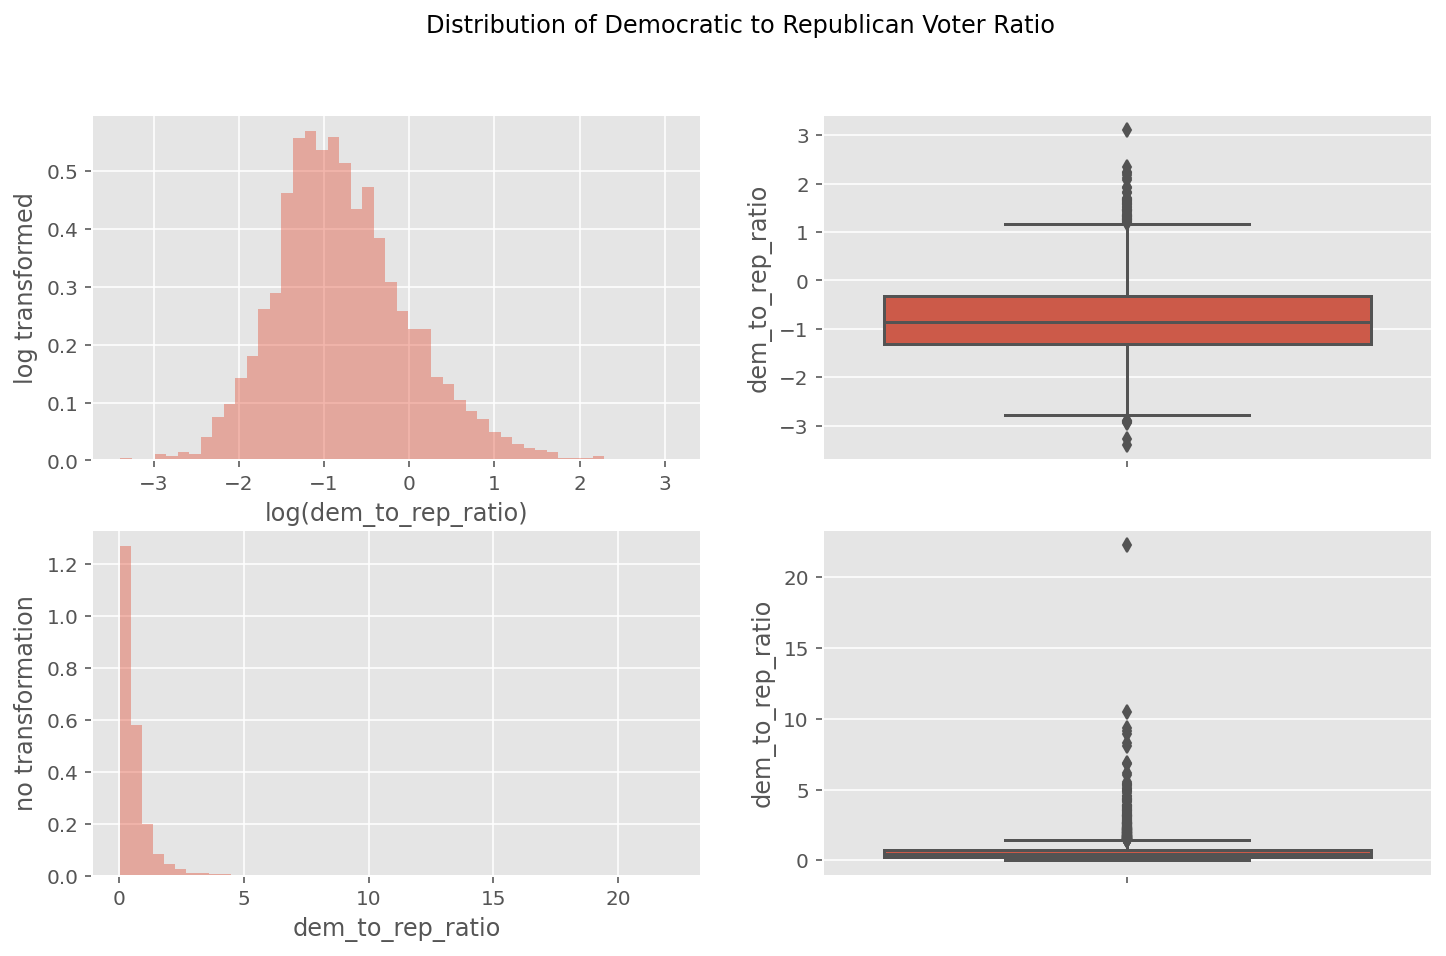

In [36]:
# Based on our summary statistics, our max greater than our minimum by a magnitude of 1,000
# Let's see if log transforming does anything

f, axes = plt.subplots(2, 2)

log_dem_to_rep_ratio = np.log(final_df['dem_to_rep_ratio'])

sns.distplot(log_dem_to_rep_ratio, kde = False, norm_hist = True, ax=axes[0, 0])

sns.boxplot(log_dem_to_rep_ratio,  orient='v' , ax=axes[0, 1]) # outliers are on both sides of boxplot 


### NON TRANSFORMED PLOTS REPLOTTED

sns.distplot(final_df['dem_to_rep_ratio'] , kde = False, norm_hist = True, ax=axes[1, 0])

sns.boxplot(final_df['dem_to_rep_ratio'],  orient='v' , ax=axes[1, 1])


plt.suptitle("Distribution of Democratic to Republican Voter Ratio")

axes[:, 0][0].set_ylabel("log transformed", size = 'large')
axes[:, 0][1].set_ylabel("no transformation", size = 'large')

axes[:, 0][0].set_xlabel("log(dem_to_rep_ratio)")
;

In [37]:
final_df['log_ratio'] = np.log(final_df['dem_to_rep_ratio'])

final_df.head()

,countyFIPS,CountyName,StateName,dem_to_rep_ratio,Date of First Case,stay at home,>50 gatherings,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,log_ratio
0,01001,Autauga,AL,0.326656,2020-03-24,11,-4,-11,-8,-5,4,-1.118846
1,01003,Baldwin,AL,0.253255,2020-03-15,20,5,-2,1,4,13,-1.373358
2,01005,Barbour,AL,0.893106,2020-04-03,1,-14,-21,-18,-15,-6,-0.113050
3,01007,Bibb,AL,0.278124,2020-03-30,5,-10,-17,-14,-11,-2,-1.279688
4,01009,Blount,AL,0.094317,2020-03-25,10,-5,-12,-9,-6,3,-2.361090


In [38]:
# the average log of the dem_to_rep_ratio
np.mean(np.log(final_df['dem_to_rep_ratio']))

-0.7711975531050828

In [39]:
# counties that are strongly Republican (1.5 IQR under the first quartile)
first_quartile_for_log = np.percentile(final_df['log_ratio'], 25)
third_quartile_for_log = np.percentile(final_df['log_ratio'], 75)
dem_rep_log_iqr = third_quartile_for_log - first_quartile_for_log

print("First Quartile: ", first_quartile_for_log)

log_very_rep = (final_df[final_df['log_ratio'] <= (
    first_quartile_for_log - 1.5*dem_rep_log_iqr)]).sort_values(
        by='log_ratio', ascending=True)

log_very_rep.head()

First Quartile:  -1.3051130379446976


,countyFIPS,CountyName,StateName,dem_to_rep_ratio,Date of First Case,stay at home,>50 gatherings,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,log_ratio
2647,48269,King,TX,0.033557,2020-04-19,-17,-29,-36,-27,-31,-31,-3.394508
2709,48393,Roberts,TX,0.038168,2020-04-16,-14,-26,-33,-24,-28,-28,-3.265759
1605,30033,Garfield,MT,0.052067,2020-04-19,-22,-22,-22,-34,-30,-30,-2.955217
1648,31007,Banner,NE,0.053221,2020-04-19,0,-31,-31,-31,-15,-15,-2.933297
1703,31117,McPherson,NE,0.054475,2020-04-19,0,-31,-31,-31,-15,-15,-2.910019


In [40]:
# counties that are strongly Democratic (1.5 IQR above the third quartile)
print("Third Quartile: ", third_quartile_for_log)

log_very_dem = (final_df[final_df['log_ratio'] >= (
    third_quartile_for_log + 1.5*dem_rep_log_iqr)]).sort_values(
        by='log_ratio', ascending=False)

log_very_dem.head()

Third Quartile:  -0.31165439346166673


,countyFIPS,CountyName,StateName,dem_to_rep_ratio,Date of First Case,stay at home,>50 gatherings,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,log_ratio
312,11001,Washington,DC,22.229820,2020-03-16,16,9,9,0,0,0,3.101435
1199,24033,Prince Georges,MD,10.485782,2020-03-10,20,6,3,6,6,6,2.350020
1821,36005,Bronx,NY,9.356457,2020-04-19,-28,-34,-37,-32,-34,-34,2.236067
217,06075,San Francisco,CA,9.156336,2020-03-05,14,14,14,14,10,10,2.214446
1849,36061,New York,NY,8.917633,2020-03-02,20,14,11,16,14,14,2.188031


In [41]:
## TO DO:
# Create another cloropleth with log transformed ratio

## Feature Assessment

Two correlation matrices were created. The first was with all six original covariates along with the outcome and its logarithmic transformation. There was relatively low correlation between the covariates and the two potential outcomes and relatively high correlation between each of the covariates. This caused some concerns regarding multicollinearity.  

''

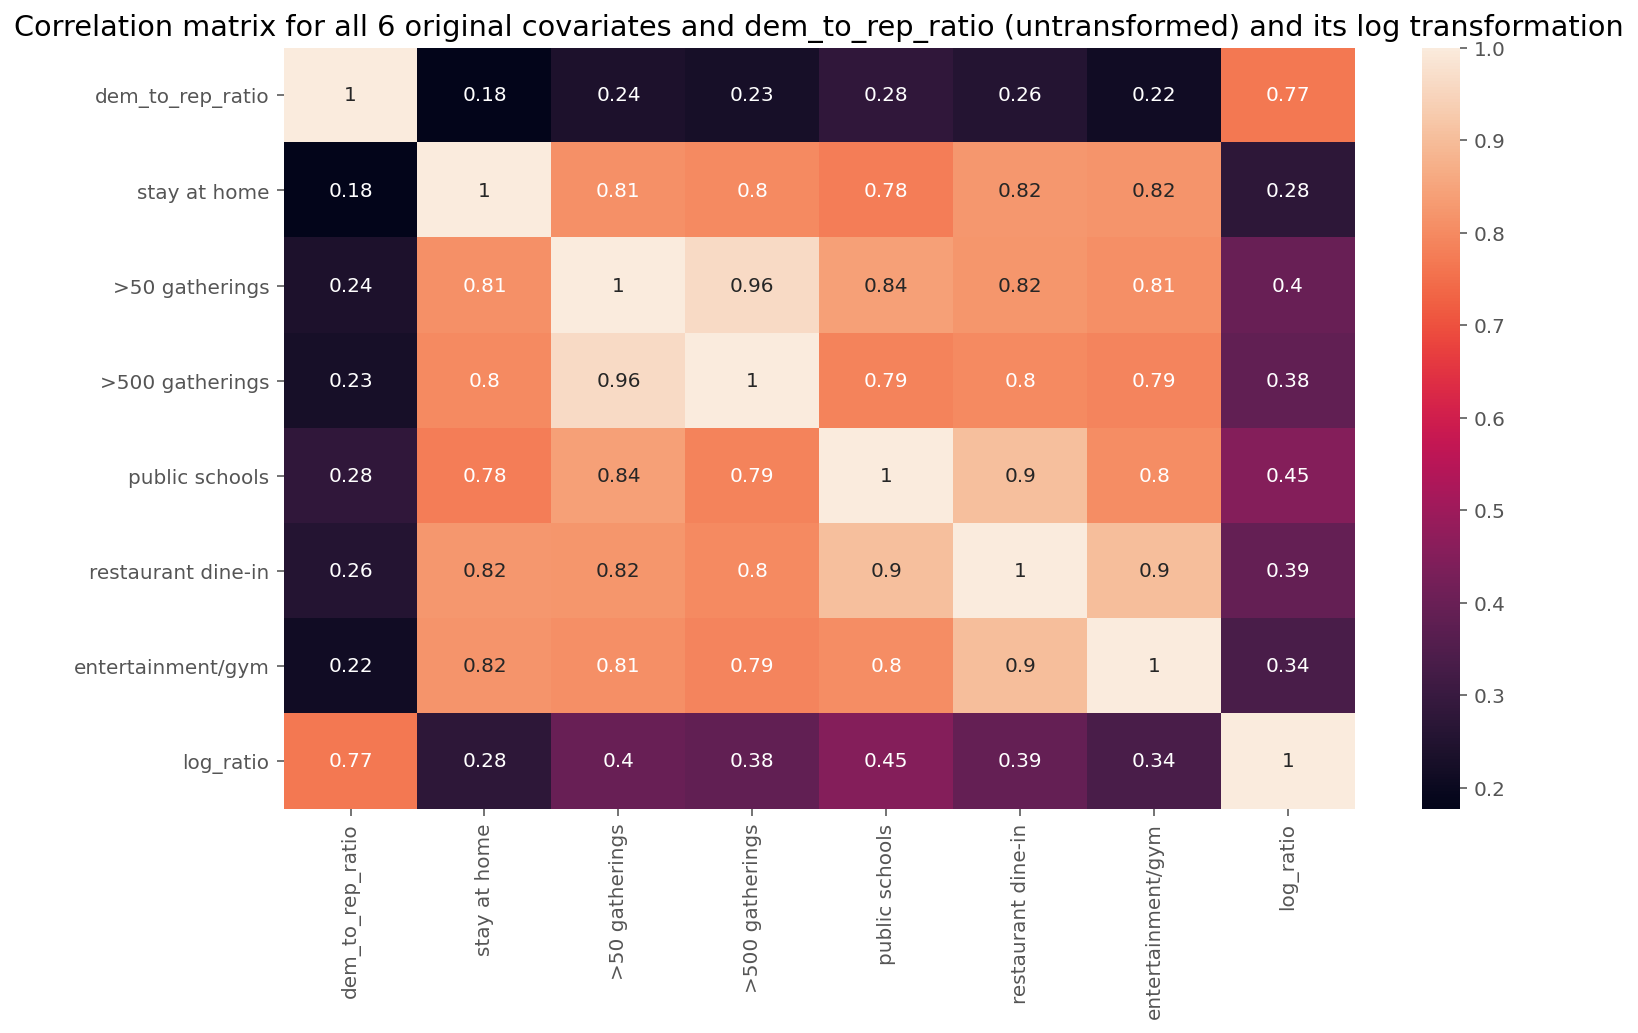

In [42]:
# checking the correlation matrix of our variables

sns.heatmap(final_df[['dem_to_rep_ratio', 'stay at home', '>50 gatherings',
       '>500 gatherings', 'public schools', 'restaurant dine-in',
       'entertainment/gym', 'log_ratio']].corr(), annot=True)

plt.title("Correlation matrix for all 6 original covariates and dem_to_rep_ratio (untransformed) and its log transformation")
;

## top right and bottom left have high correlation because
## they are transformations of each other

## variables have virtually no correlation with direct ratio
## variables have low correlation [0.3, 0.5] with log-transformed
## source: https://www.andrews.edu/~calkins/math/edrm611/edrm05.htm

## probs should stick with the log-transformed version

In [43]:
# indepdent_vars.columns

indepdent_vars = final_df[['stay at home', '>50 gatherings',
       '>500 gatherings', 'public schools', 'restaurant dine-in',
       'entertainment/gym']]

In [44]:
# a function to find each feature's variation inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df, drop_cols = None):
    if drop_cols is not None:
        df = df.drop(columns = drop_cols)
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif["features"] = df.columns

    return vif

In [45]:
indepdent_vars = final_df.iloc[:, 5:11]


calculate_vif(indepdent_vars)

,VIF Factor,features
0,2.087105,stay at home
1,19.861616,>50 gatherings
2,16.012643,>500 gatherings
3,10.481875,public schools
4,15.898857,restaurant dine-in
5,7.800635,entertainment/gym


In [46]:
calculate_vif(indepdent_vars, '>50 gatherings')

,VIF Factor,features
0,1.649214,stay at home
1,4.336943,>500 gatherings
2,8.971839,public schools
3,15.065305,restaurant dine-in
4,7.707566,entertainment/gym


In [47]:
calculate_vif(indepdent_vars, ['>50 gatherings', 'restaurant dine-in'])

,VIF Factor,features
0,1.649205,stay at home
1,4.322311,>500 gatherings
2,4.567784,public schools
3,4.832102,entertainment/gym


''

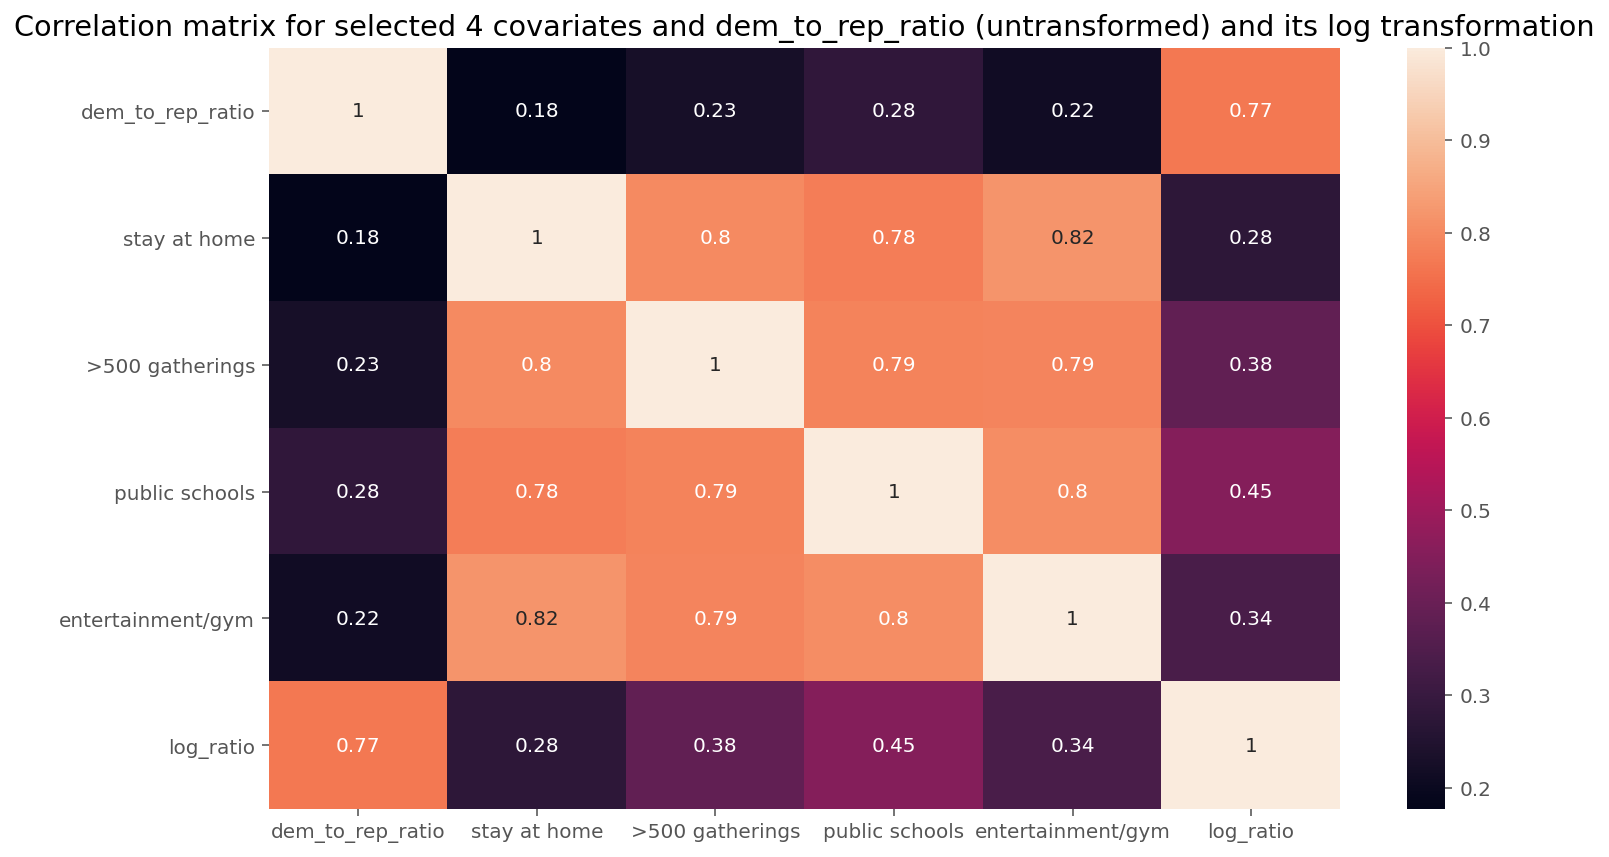

In [48]:
# checking our correlation matrix again
sns.heatmap(final_df[['dem_to_rep_ratio', 'stay at home', 
       '>500 gatherings', 'public schools', 
       'entertainment/gym', 'log_ratio']].corr(), annot=True)

plt.title("Correlation matrix for selected 4 covariates and dem_to_rep_ratio (untransformed) and its log transformation")
;

## not a lot of change to the correlation matrix
## indicates that there isn't much loss by excluding them
## some improvement with l

## Making Our Model

A training and test set were generated with the county-level data. Cross-validation was not necessary since it is typically used to maximize the “value” of each data point in a small dataset. However, we had a relatively large dataset of 3,114 counties/data points. Utilizing a 90:10 training:test split would still leave 311 counties to measure our model’s performance. While it was not necessary, we respecified the code for the split for each model to update the variable names, but the random seed was set so the individual counties in each set were the same. 

The first model (‘linear_model’) was created with the following columns as the features of the X, 'stay at home', '>50 gatherings', '>500 gatherings', 'public schools', 'restaurant dine-in', 'entertainment/gym'. ‘dem_to_rep_ratio’ is the Y. 

In [49]:
# split the data set into a training set and test set

from sklearn.model_selection import train_test_split
np.random.seed(47)

X = final_df[[
    'stay at home', '>50 gatherings', '>500 gatherings', 'public schools',
    'restaurant dine-in', 'entertainment/gym'
]]
Y = pd.Series(final_df['dem_to_rep_ratio'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)
#X_train, y_train

In [50]:
# first linear model
import sklearn.linear_model as lm

linear_model = lm.LinearRegression()

# Fit your linear model
linear_model.fit(X_train, Y_train)
Y_pred = linear_model.predict(X_train)

Text(0.5, 1.0, 'Democratic to Republic Ratio vs Predicted Democratic to Republic Ratio of the Training Set')

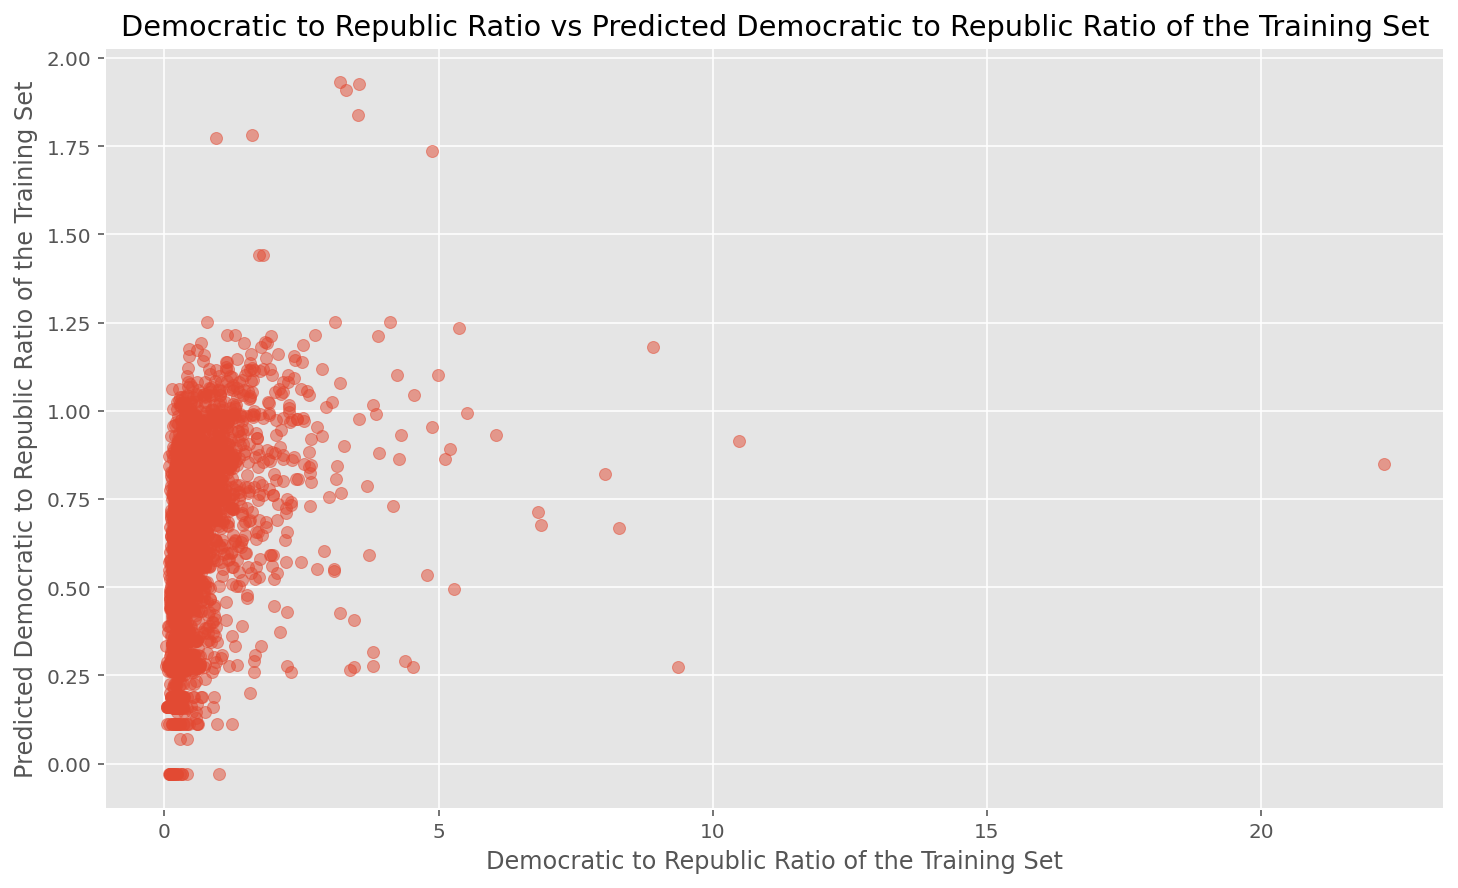

In [51]:
# scatterplot of training set of first linear model

import matplotlib.pyplot as plt
plt.scatter(Y_train, linear_model.predict(X_train), alpha=0.5)
plt.xlabel("Democratic to Republic Ratio of the Training Set")
plt.ylabel("Predicted Democratic to Republic Ratio of the Training Set")
plt.title(
    "Democratic to Republic Ratio vs Predicted Democratic to Republic Ratio of the Training Set"
)

In [52]:
# function to calculate RMSE
def rmse(actual, predicted):
    return np.sqrt(np.mean((actual - predicted)**2))

In [53]:
# error of our model
train_error = rmse(Y_train, Y_pred)

print("Training RMSE:", train_error) # eh this is OK...will making it log-linear help?

Training RMSE: 0.818451247601979


### With Feature Selection

A more selective model (‘select_linear_model’) was made by calculating variance inflation factors (VIF), which served as a measure of multicollinearity. Through this measure, the following covariates were identified to introduce the least collinearity: 'stay at home', '>500 gatherings', 'public schools', 'entertainment/gym'.

In [54]:
# second training and training sets with select features
X_select = final_df[[
    'stay at home', '>500 gatherings', 'public schools',
    'entertainment/gym'
]]
Y = pd.Series(final_df['dem_to_rep_ratio'])

X_train_select, X_test_select, Y_train_select, Y_test_select = train_test_split(X_select, Y, test_size=0.1)


In [55]:
# second model
select_linear_model = lm.LinearRegression()

# Fit your linear model
select_linear_model.fit(X_train_select, Y_train_select)
Y_pred_select = select_linear_model.predict(X_train_select)

In [56]:
# error of our model
select_train_error = rmse(Y_train_select, Y_pred_select)

print("Selected Feature Training RMSE:", select_train_error)

Selected Feature Training RMSE: 0.8229611704770469


## With the Log-Transformed Outcome

A log-linear model (‘log_linear_model’) using the same features as ‘select_linear_model’, but ‘dem_to_rep_ratio’ (outcome) was log-transformed in order to make our outcome have a more normal distribution and to account for the large magnitude of difference.

In [57]:
# log of dem_to_rep_ratio as new Y
log_X = final_df[[
    'stay at home', '>500 gatherings', 'public schools',
    'entertainment/gym'
]]

log_Y = pd.Series(final_df['log_ratio'])

log_X_train, log_X_test, log_Y_train, log_Y_test = train_test_split(log_X, log_Y, test_size=0.1) # 90:10 split since dataset is large
#X_train, y_train

log_X

,stay at home,>500 gatherings,public schools,entertainment/gym
0,11,-11,-8,4
1,20,-2,1,13
2,1,-21,-18,-6
3,5,-17,-14,-2
4,10,-12,-9,3
...,...,...,...,...
3129,-5,-13,-13,-14
3130,1,-7,-7,-8
3131,-22,-30,-30,-31
3132,6,-7,3,-3


In [58]:
# third model
log_linear_model = lm.LinearRegression()

# Fit your linear model
log_linear_model.fit(log_X_train, log_Y_train)
log_Y_pred = log_linear_model.predict(log_X_train)

In [59]:
# error of the third model
log_train_error = rmse(log_Y_train, log_Y_pred)

print("Log-Linear Training RMSE:", log_train_error)

Log-Linear Training RMSE: 0.6891179283881378


In [60]:
print("Training RMSE:", train_error)
print("Selected Feature Training RMSE:", select_train_error)
print("Log-Linear Training RMSE:", log_train_error) # best model!

Training RMSE: 0.818451247601979
Selected Feature Training RMSE: 0.8229611704770469
Log-Linear Training RMSE: 0.6891179283881378


''

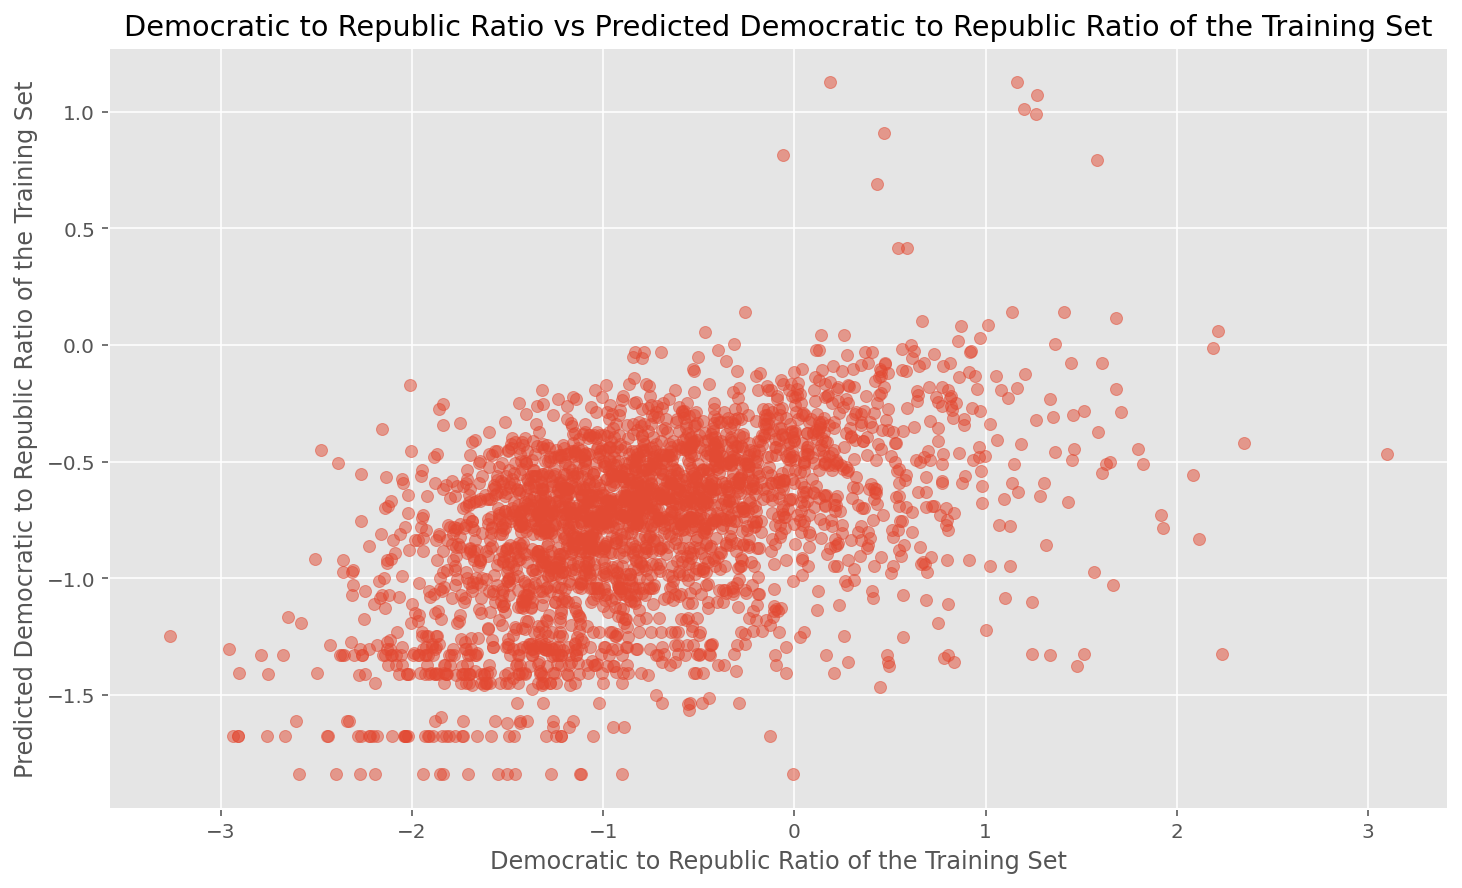

In [61]:
# scatterplot of our third model
plt.scatter(log_Y_train, log_Y_pred, alpha=0.5)
plt.xlabel("Democratic to Republic Ratio of the Training Set")
plt.ylabel("Predicted Democratic to Republic Ratio of the Training Set")
plt.title(
    "Democratic to Republic Ratio vs Predicted Democratic to Republic Ratio of the Training Set"
)
;

## Predicting Political Party Majority

The majority column was created to answer the second research question of being able to use the same columns to predict a democratic or republican majority, a slightly more general question that can be answered with a logistic regression since it is a dichotomous outcome. It was created so that it would equal 1 if there was a republican majority (i.e. ‘dem_to_rep_ratio’  > 1) or 0 if there was a democratic majority (i.e. ‘dem_to_rep_ratio’  < 1). 

In [62]:
final_df.loc[final_df['dem_to_rep_ratio'] > 1, 'majority'] = 0 # Democratic Majority = 0
final_df.loc[final_df['dem_to_rep_ratio'] < 1, 'majority'] = 1 # Republican Majority = 1

final_df = final_df.astype({'majority': 'int32'})

In [63]:
final_df = final_df[['countyFIPS', 'CountyName', 'StateName', 'dem_to_rep_ratio',
                      'log_ratio', 'majority',
                      'Date of First Case', 'stay at home', '>50 gatherings',
                      '>500 gatherings', 'public schools', 'restaurant dine-in',
                      'entertainment/gym']]

final_df.head()

,countyFIPS,CountyName,StateName,dem_to_rep_ratio,log_ratio,majority,Date of First Case,stay at home,>50 gatherings,>500 gatherings,public schools,restaurant dine-in,entertainment/gym
0,01001,Autauga,AL,0.326656,-1.118846,1,2020-03-24,11,-4,-11,-8,-5,4
1,01003,Baldwin,AL,0.253255,-1.373358,1,2020-03-15,20,5,-2,1,4,13
2,01005,Barbour,AL,0.893106,-0.113050,1,2020-04-03,1,-14,-21,-18,-15,-6
3,01007,Bibb,AL,0.278124,-1.279688,1,2020-03-30,5,-10,-17,-14,-11,-2
4,01009,Blount,AL,0.094317,-2.361090,1,2020-03-25,10,-5,-12,-9,-6,3


In [64]:
# creating the majority column and training and testing sets
logm_X = final_df[['stay at home', '>50 gatherings',
                   '>500 gatherings', 'public schools', 'restaurant dine-in',
                   'entertainment/gym'
]]

logm_Y = pd.Series(final_df['majority'])


logm_X_train, logm_X_test, logm_Y_train, logm_Y_test = train_test_split(logm_X, logm_Y, test_size=0.1) # 90:10 split since dataset is large


In [65]:
# logistic regression
log_model = lm.LogisticRegression()

log_model = log_model.fit(logm_X_train, logm_Y_train)

logm_Y_pred = log_model.predict(logm_X_train)

In [66]:
# accuracy of full logistic model
logisticm_training_accuracy = log_model.score(logm_X_train, logm_Y_train)

print("Full Logistic Model Training Accuracy:", logisticm_training_accuracy)

Full Logistic Model Training Accuracy: 0.8508208422555318


In [67]:
# creating the majority column and training and testing sets
# NOTE: SAME EXACT VARIABLES AS FULL MODEL
# (didn't have to distinguish since the second model was better anyways
logm_X = final_df[[
    'stay at home', '>500 gatherings', 'public schools',
    'entertainment/gym'
]]

logm_Y = pd.Series(final_df['majority'])


logm_X_train, logm_X_test, logm_Y_train, logm_Y_test = train_test_split(logm_X, logm_Y, test_size=0.1) # 90:10 split since dataset is large


In [68]:
# logistic regression
log_model = lm.LogisticRegression()

log_model = log_model.fit(logm_X_train, logm_Y_train)

logm_Y_pred = log_model.predict(logm_X_train)

In [69]:
# accuracy of selected logistic model
logisticm_training_accuracy = log_model.score(logm_X_train, logm_Y_train)

print("Logistic Model Training Accuracy:", logisticm_training_accuracy)

## the selected logistical model did marginally better than the full model

Logistic Model Training Accuracy: 0.856887937187723



## Validing Our Model with the Test Data
How well did we do?

### Log-Linear Model

In [70]:
test_error = rmse(log_Y_test, log_linear_model.predict(log_X_test))
print("Test RMSE:", test_error) # want lower error

Test RMSE: 0.6664687380264036


In [71]:
print(log_linear_model.intercept_)  
print(log_linear_model.coef_)

-0.3276920270506425
[-0.01556346  0.01228506  0.03169562 -0.0010577 ]


In [72]:
m1, m2, m3, m4 = log_linear_model.coef_
b = log_linear_model.intercept_
print('dem_to_rep_ratio = {0} + {1} * stay at home + {2} * >500 gatherings + {3} * public schools + {4} * entertainment/gym'.format(round(b, 3), round(m1, 3), round(m2, 3), round(m3, 3), round(m4, 3)))

dem_to_rep_ratio = -0.328 + -0.016 * stay at home + 0.012 * >500 gatherings + 0.032 * public schools + -0.001 * entertainment/gym


In [73]:
display(
    Latex(
        r'\text{{log}}(\texttt{{dem\_to\_rep\_ratio}}) = {0} + {1} * \texttt{{stay at home}} + {2} * \texttt{{>500 gatherings}} + {3} * \texttt{{public schools}} + {4} * \texttt{{entertainment/gym}}'.format(round(b, 3), round(m1, 3), round(m2, 3), round(m3, 3), round(m4, 3))
    )
)

<IPython.core.display.Latex object>

### Logistic Model

In [74]:
logm_accuracy = log_model.score(logm_X_test, logm_Y_test)
print("Test Accuracy:", logm_accuracy) # want higher accuracy


Test Accuracy: 0.8141025641025641


In [75]:
print(log_model.intercept_)  
print(log_model.coef_)

[0.71050957]
[[ 0.05161111 -0.01218421 -0.09500588 -0.02724055]]


In [76]:
m1, m2, m3, m4 = log_model.coef_[0]
b = log_model.intercept_[0]

In [77]:
display(
    Latex(
        r'\text{{logit}}(\texttt{{majority}}) = {0} + {1} * \texttt{{stay at home}} + {2} * \texttt{{>500 gatherings}} + {3} * \texttt{{public schools}} + {4} * \texttt{{entertainment/gym}}'.format(round(b, 3), round(m1, 3), round(m2, 3), round(m3, 3), round(m4, 3))
    )
)

<IPython.core.display.Latex object>

## Data Visualization

### Population

In [1]:
import plotly.express as px
import json

# from urllib.request import urlopen
# with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
#     counties = json.load(response)

# if file is local
counties = json.dumps('./geojson-counties-fips.json')

In [0]:
fig_log_party = px.choropleth_mapbox(final_df, geojson=counties, locations='countyFIPS', color='log_ratio',
                           color_continuous_scale="bluered_r",
                           range_color=(-4, 4),
                           mapbox_style="carto-positron",
                           hover_name = final_df['CountyName'],
                           zoom=3, center = {"lat": 37.0902, "lon": -95.7129},
                           opacity=0.5,
                           labels={'log_ratio':'log(Dem:Rep Ratio)'}, 
                           title = 'log(Democrat to Republican Ratio) of US Counties in 2016 Election'
                          )


fig_log_party.update_layout(margin={"r":0,"l":0,"b":0})
fig_log_party.show()

In [0]:
fig_majority = px.choropleth_mapbox(final_df.replace({'majority' : {0 : "Democratic", 1 : "Republican"}}), geojson=counties, locations='countyFIPS', color='majority',
                        #    color_continuous_scale="bluered",
                           color_discrete_map = {"Democratic" : "#0000ff", "Republican" : "#ff0000"},
                        #    range_color=(0, 1),
                           mapbox_style="carto-positron",
                           hover_name = final_df['CountyName'],
                           zoom=3, center = {"lat": 37.0902, "lon": -95.7129},
                           opacity=0.5,
                        #    labels={'log_ratio':'log(Dem:Rep Ratio)'}, 
                           title = 'Political Party Majority of US Counties in 2016 Election'
                          )


fig_majority.update_layout(margin={"r":0,"l":0,"b":0}, coloraxis_showscale=True, showlegend=True, geo = dict(showsubunits=True))

fig_majority.show()

In [0]:
df['log_pop'] = np.log(df['PopulationEstimate2018'])

fig_pop = px.choropleth_mapbox(df, geojson=counties, locations='countyFIPS', color='log_pop',
                           color_continuous_scale="Viridis",
                           range_color=(0, 13),
                           mapbox_style="carto-positron",
                           hover_name = df['CountyName'],
                           zoom=3, center = {"lat": 37.0902, "lon": -95.7129},
                           opacity=0.5,
                           labels={'log_pop':'log(Population)'}, 
                           title = 'Population of US Counties in 2018'
                          )


fig_pop.update_layout(margin={"r":0,"l":0,"b":0})
fig_pop.show()

## Conclusion

Based on our results, we were able to derive a formula that relates the timing of implementation of social distancing orders to county-level political party preference. These coefficients of the model are not in the same direction (positive or negative) for all of the orders, suggesting there might be more to be considered when attempting to find an association between these variables. We did not conduct any significance tests on our coefficients, so we cannot be certain that our coefficients are actually statistically significant. This is especially a concern for us because the coefficients are so small. This is potentially something that can be done in future analyses since statistical significance tests are outside the scope of this class and are not natively supported by scikit-learn. 
	This project has prompted several other questions related to political preference and handling of COVID-19. One such question that we would be interested in investigating relates to how a county’s handling of COVID-19, not necessarily limited to implementation of social distancing orders, relates to President Trump’s approval rating. 
